# Co-drying of methanol and toluol from poly-(vinylacetate)

This jupyter notebook models the co-drying of two solvents from a polymer. First we import the diffusion model and the pc-saft implementation from diffusionpy

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS
import matplotlib.pyplot as plt

The experimental data which is defined in the cell below  was taken from Schabel et al. (https://doi.org/10.1016/j.ces.2006.12.062)

In [2]:
#time in minutes
#drying kinetics
texp=np.asarray([0,4.427792916,14.50035208,23.87257753,33.76909653,45.58674953,58.69408811,71.80142669,91.44521324,120.9089796,147.0930411,177.8656278,212.5493678,264.9136638,429.8518201])
wpvac=np.asarray([0.333333333,0.397028757,0.559683846,0.704648614,0.763915741,0.791401827,0.801167219,0.822653035,0.830878575,0.841458325,0.846286716,0.857199094,0.851138308,0.858388537,0.8723936549])
wtol=np.asarray([0.333333333,0.361083897,0.34858624,0.273123698,0.22781745,0.202716913,0.188759833,0.17692216,0.169121425,0.158541675,0.153713284,0.142800906,0.143816828,0.137082518,0.123003508])
wmet=np.asarray([0.333333333,0.241887346,0.091729914,0.022227687,0.008266808,0.00588126,0.010072947,0.000424805,0,0,0,0,0,0,0])

The drying starts from a mixture of methanol-toloul-PVAc in equal parts and ends with a remaining pvac-toluol mixture. We define the temperature, the presssure, the number of components, their molar mass and the starting and equilibrium weight fractions.

In [3]:
L=2.32E-5 # initial thickness of sample
wi0=np.asarray([0.333333333,0.333333333,0.333333333]) # Weight fractions of the components methanol, toluol and PVAc at t=0
wi8=np.asarray([0.0001,0.127606346,0.872393654]) # Weight fractions of the components methanol, toluol and PVAc at t=infty

For describing the diffusion in the mixture, a matrix of diffusion coefficients needs to be defined. The matrix for this ternary system is displayed below: Here m denotes the methanol, t denotes the toluol and, p denotes the PVac 


$\hat{Ð} =$ 
$\left[\begin{array}{rrr} 
0 & Ð_{mt} & Ð_{mp} \\ 
Ð_{tm} & 0 & Ð_{tp} \\ 
Ð_{pm} & Ð_{pt} & 0 \\ 
\end{array}\right]$

where $\hat{Ð}$ is the matrix of diffusion coefficients and $Ð_{ij}$ are the binary diffusion coefficients of component i moving in j. Friction between the same species is not required, thus $Ð_{ii}=0$ .
So, $ Ð_{mt}$ is the methanol toluol diffusion coefficient,  $Ð_{mp}$ is the methanol PVAC diffusion coefficient and $Ð_{tp}$ is the toluol PVAC diffusion  ceofficient
Furthermore, the Stefan-Maxwell diffusion coefficients have a symmetric property where for each pair of binary diffusion coefficients this relation holds $Ð_{ij}=Ð_{ji}$

Thus, for describing the diffusion in a ternary system, only three binary diffusion coefficients need to be defined:

$Ð_{vec} = \left[\begin{array}{rrr} Ð_{mt} & Ð_{mp} & Ð_{tp} \end{array}\right]$


In [4]:
Dmt=1E-9
Dmp=5E-11
Dtp=1E-11
Dvec=np.asarray([Dmt,Dmp,Dtp])

Lastly, one needs to specify which components is considered mobile and which immobile. In our case, the solvents are  mobile while the polymer can be considered immobile. These properties are defined as a boolean array.

In [5]:
mobile=np.asarray([True,True,False])

Finally, we can model solvent desorption. First in the ideal case and plot the results

C:\Users\smdoboet\diffusionpy\diffusionpy\diffusion.py:87: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  for i in range(nz_1): dai[:,i]=THFaktor_[i,:,:]@dwi[:,i]


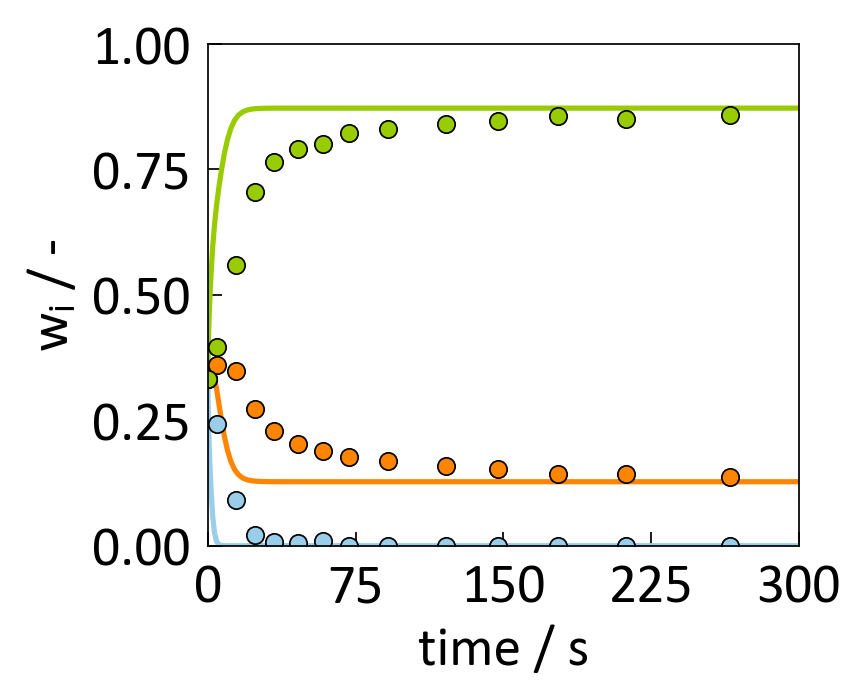

In [6]:

t=np.linspace(0,texp[-1]**0.5,80)**2    
wtid=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile)[0]



def plot(wt):
    fig,ax=plt.subplots()
    ax.plot(t,wt[:,0],"C1-")
    ax.plot(t,wt[:,1],"C3-")
    ax.plot(t,wt[:,2],"C0-")
    ax.plot(texp,wmet,"C1o")
    ax.plot(texp,wtol,"C3o")
    ax.plot(texp,wpvac,"C0o")
    ax.set_xlabel("time / s")
    ax.set_ylabel("$w_i$ / -")
    ax.set_xticks([0.,75.,150.,225.,300.])
    ax.set_yticks([0.,0.25,0.5,0.75,1.])
    ax.set_xlim([0.,300.])
    ax.set_ylim([0,1.])
    plt.show()
plot(wtid)

diffusionpy neglects non-idealities for the default case. If the user wants to consider non-idealities a thermodynamic model is needed. 
diffusionpy comes prepackaged with an implementation of the pc-saft equation of state. 
PC-SAFT parameteters can be defined as follows:
The kij are defined in the same manner as the diffusion coefficients
Pure component data are defined in the order methanol, toluol and PVAC

In [7]:

kmt=0.029
kmp=-0.05855362
ktp=0.027776682
kijvec=np.asarray([kmt,kmp,ktp])
mm=1.5255 
mt=2.8149 
mp=2889.9
par={"mi":np.asarray([mm,mt,mp]),
"si": np.asarray([3.2300, 3.7169, 3.3972]),
"ui" :np.asarray([188.9, 285.69, 204.65]),
"eAi" :np.asarray([2899.5, 0., 0.]),
"kAi":np.asarray([0.035176, 0., 0.]),
"NAi":np.asarray([1., 0., 1047.]),
"Mi": np.asarray([32.04,92.14,90000.]),
"kij":kijvec}



tldr; Non-dealities are employed using PC-SAFT automatically when giving the par struct to the Diffusion_MS function 

more info:
Non-dealities are employed using the second derivative of activities $a_i$ of component i towards j. 

$\Gamma_{ij}=\frac{Dlna_i}{Dlnw_j} \frac{w_i}{r_i} $ , where $D$ denotes that the differentiation was performed while neglecting the mass balance. $w_i$ is the mass fraction and $r_i$ is the mass segment number defined as $r_i= \frac{M_i}{min(M_i)}$

The nonidealities employed in an iterative fashion and are supplied for each point in space and time. 

Additionally, full output can specified in order to recieve e.g the spatial information of the concentrations
We can plot the time and spatial profiles of methanol and toluene

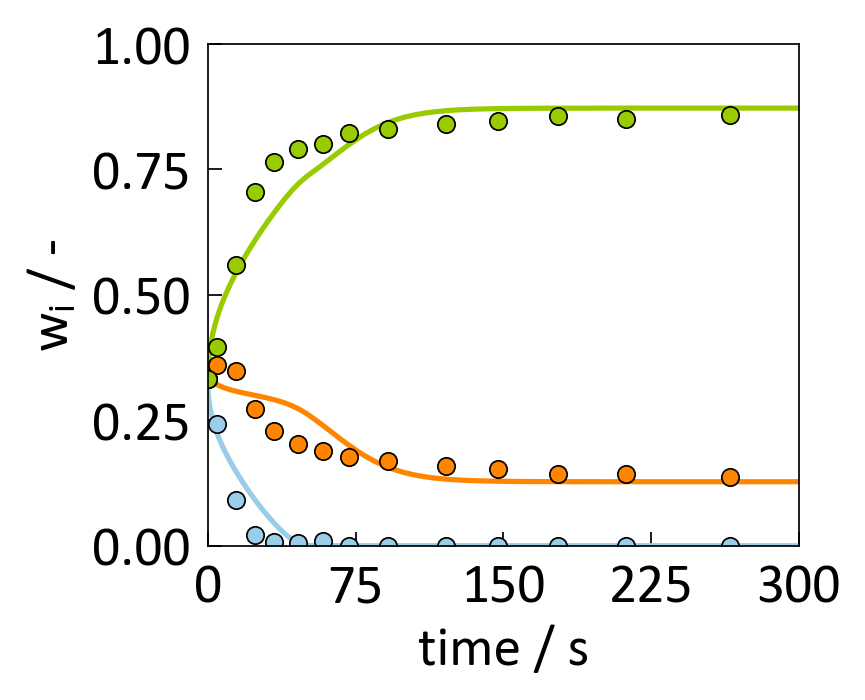

In [8]:
T=298.15
p=1E5
wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,T=T,p=p,saftpar=par)
plot(wt)

Finally, diffusionpy provides an interface to change the boundary conditions. For example here, we provide a time-dependant surface cocnentartion to consider that the surface concentration needs time to establish due to gassided diffusion limitations. Checkout example book 01b and 01c for another example on that topic

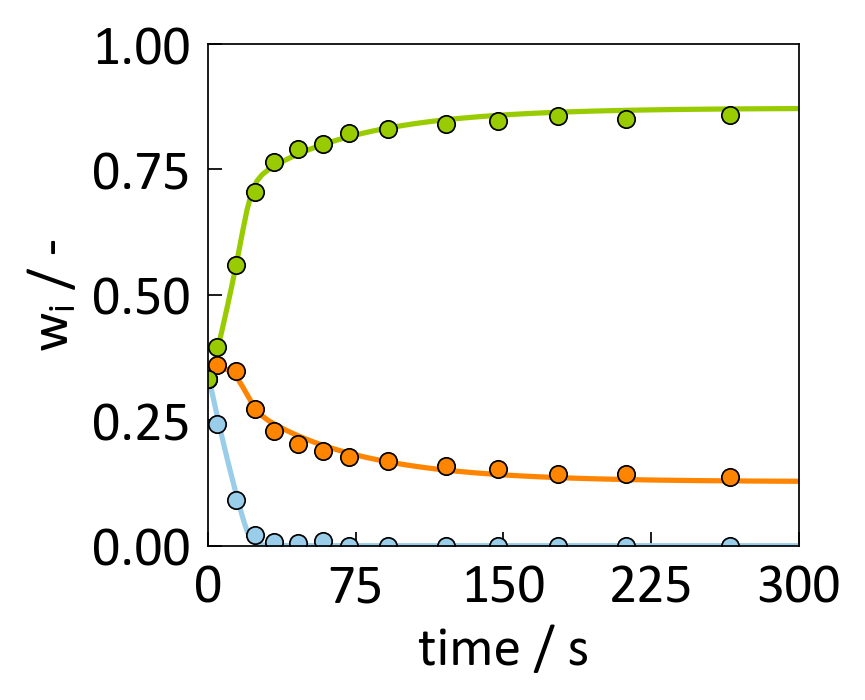

In [9]:
taui=np.asarray([5,55])
from diffusionpy.surface import time_dep_surface
witB=time_dep_surface(t,wi0,wi8,mobile,taui)
Dvec=np.asarray([1E-5,2E-10,2E-10])
wt,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,mobile,T=T,p=p,saftpar=par,taui=taui)
plot(wt)